## Introduction to TensorFlow 

Presents : 
- José Armando Melchor Soto

---

### Libraries 

In [2]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense # type: ignore
from tensorflow.keras.models import Sequential # type: ignore

c:\Users\ppmel\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\ppmel\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\ppmel\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

---

### Build the model using TensorFlow 

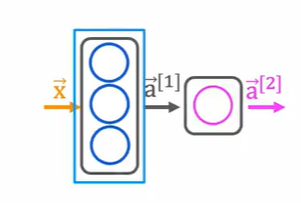

---

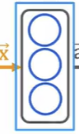

In [3]:
x = np.array([[200.0, 17.0]])
layer_1 = Dense(units=3 , activation= 'sigmoid')
a1 = layer_1(x)

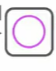

In [4]:
layer_2 = Dense(units=1 , activation= 'sigmoid')
a2 = layer_2(a1)

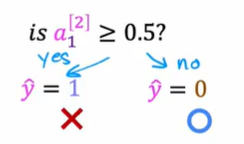

In [5]:
if a2 >= 0.5:
    yhat = 1
else:
    yhat = 0
    
yhat

1

---

### With a large model for digit classification

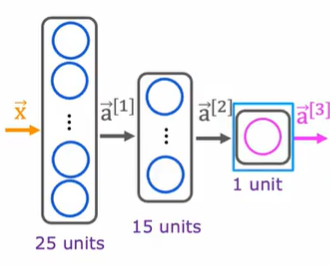

---

In [6]:
x = np.random.rand(1,25) #array with 25 numbers 
layers_1 = Dense(units=25 , activation = 'sigmoid') # 25 neurons with sigmoid function
a1 = layers_1(x) # Activation output a1

In [7]:
layers_2 = Dense(units=15 , activation = 'sigmoid') # 15 neurons with sigmoid function
a2 = layers_2(a1) # Activation output a2

In [8]:
layers_3 = Dense(units=1 , activation = 'sigmoid') # 1 neurons with sigmoid function
a3 = layers_3(a2) # Activation output a1

In [9]:
if a3 >= 0.5:
    yhat = 1
else:
    yhat = 0
    
yhat

0

---

### Note about numpy array 

$$
\begin{array}{|c|c|c|}
\hline
\text{Temperature (Celsius)}  & \text{Duration (minutes)} & \text{good coffee?} (0,1) \\
\hline
200 & 17 & 1 \\
\hline
425 & 18.5 & 0 \\
\hline
··· & ··· & ··· \\
\hline
\end{array}
$$


1 x 2 vector 

$$
\begin{bmatrix}
200 &
17

\end{bmatrix}
$$

In [10]:
x = np.array([[200, 17]])
print(x)

[[200  17]]


2 x 1 vector 

$$
\begin{bmatrix}
200 \\
17 \\

\end{bmatrix}
$$

In [11]:
x = np.array([[200], [17]])
print(x)

[[200]
 [ 17]]


1D vector 

In [12]:
x = np.array([200,17])
print(x)

[200  17]


---

### Activation vector 

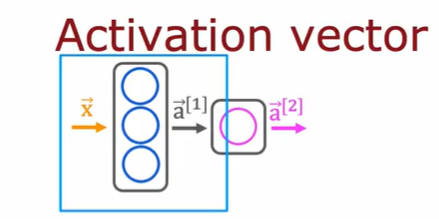

In [13]:
x = np.array([[200,17]])
layer_1 = Dense(units = 3 , activation= 'sigmoid')
a1 = layer_1(x)
a1.numpy()

array([[1., 0., 0.]], dtype=float32)

In [14]:
layer_2 = Dense(units = 1 , activation= 'sigmoid')
a2 = layer_2(a1)
a2

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.28857327]], dtype=float32)>

In [15]:
a2.numpy()

array([[0.28857327]], dtype=float32)

---

### Building a neural network architecture



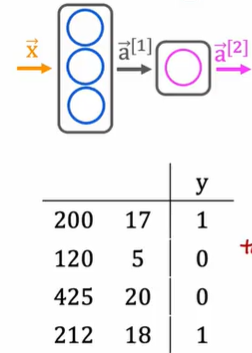

In [16]:
layer_1 = Dense(units = 3 , activation= "sigmoid")
layer_1 = Dense(units = 1 , activation= "sigmoid")
model = Sequential([layer_1, layer_2])

x = np.array([[200 , 17 ], 
              [120,5],
              [425 , 20 ],
              [212, 18]])

y = np.array ([1,0,0,1])

A better form to write the code 

In [17]:
model = Sequential([
    Dense(units = 3 , activation= "sigmoid"), # layer 1
    Dense(units = 1 , activation= "sigmoid")  # layer 2 
])


x = np.array([[200 , 17 ], 
              [120,5],
              [425 , 20 ],
              [212, 18]])


y = np.array ([1,0,0,1]) #targets

# model.compile(...)
#model.fit(x,y)
#model.predict(x_new)

---

### Forward prop (with numpy)

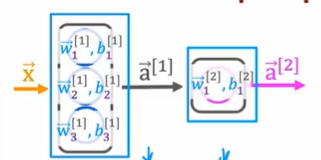

In [18]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [19]:
x = np.array([200, 17]) # input vector 

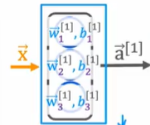

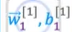

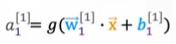

In [20]:
w1_1 = np.array([1,2])
b1_1 = np.array([-1])
z1_1 = np.dot( w1_1, x ) + b1_1 # w * x + b
a1_1 = sigmoid(z1_1)

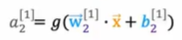

In [21]:
w1_2 = np.array([-3,4])
b1_2 = np.array([1])
z1_2 = np.dot( w1_2, x ) + b1_2 # w * x + b
a1_2 = sigmoid(z1_2)

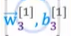

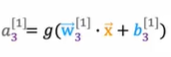

In [22]:
w1_3 = np.array([5,-6])
b1_3 = np.array([2])
z1_3 = np.dot( w1_3, x ) + b1_3 # w * x + b
a1_3 = sigmoid(z1_3)

In [23]:
a1= np.array([a1_1,a1_2,a1_3])
a1

array([[1.00000000e+000],
       [2.45261912e-231],
       [1.00000000e+000]])

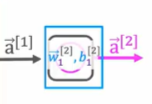

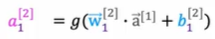

In [24]:
w2_1 = np.array([-7,8,9])
b2_1 = np.array([3])
z2_1 = np.dot( w2_1, a1 ) + b2_1 # w * a1 + b
a2_1 = sigmoid(z2_1)
a2_1

array([0.99330715])

---

### Forward prop in Numpy - Function

In [25]:
def dense(a_in, W , b):
    units = W.shape[1] # 3 neurons
    a_out = np.zeros(units) # [0,0,0]
    for j in range (units): # 0,1,2
        w = W[:,j]
        z = np.dot(w,a_in) + b[j]
        a_out[j] = sigmoid(z)
    return a_out

capital $w$ refers to a matrix  

In [26]:
def sequential(x, w1, b1, w2,b2, w3,b3 , w4,b4 ):
    a1= dense(x,w1,b1)
    a2= dense(a1,w2,b2)
    a3= dense(a2,w3,b3)
    a4= dense(a3,w4,b4)
    f_x = a4
    return f_x

In [27]:
def my_predict(X, w1, b1, w2, b2, w3, b3, w4, b4):
    m = X.shape[0]
    p = np.zeros((m,1))
    
    for i in range(m):
        p[i,0] = sequential(
            X[i],
            w1, b1,
            w2, b2,
            w3, b3,
            w4, b4
        )
    return p

---

### For loops vs vectorization



### loops 

In [ ]:
def dense(a_in, W , b):
    units = W.shape[1] # 3 neurons
    a_out = np.zeros(units) # [0,0,0]
    for j in range (units): # 0,1,2
        w = W[:,j]
        z = np.dot(w,a_in) + b[j]
        a_out[j] = sigmoid(z)
    return a_out

### vectorization

In [32]:
X = np.array([[200,17]])
W = np.array([[1,-3,5], [-2,4,-6]])
B = np.array([[-1,1,2]])

def dense(a_in, W , B):
    Z = np.matmul(a_in,W) + B
    A_out = sigmoid(Z)
    return A_out
